In [2]:
import os
import sys
import json
from json import JSONDecodeError
import csv
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.translate import bleu_score
from scipy.stats import ttest_ind
from scipy.stats import linregress
from tqdm import tqdm
import numpy as np
from pyrouge import Rouge155
%matplotlib inline

In [3]:
from utils import load_vocab, decode_caption, load_caption, rrv_votes, load_annotations, print_image

In [4]:
vocab = load_vocab(dict_file = "../outputs/vocab/5000/coco2014_vocab.json")
image_id_to_index, index_to_image_id, annotations_dict = load_annotations(annotations_dir="../../annotations/", 
                                                                          annotations_file='captions_val2014.json',
                                                                         map_file = "../outputs/val_image_id_to_idx.csv")
print("Processed {} images".format(len(image_id_to_index)))
print("Processed {} images".format(len(annotations_dict.keys())))

word_to_idx
idx_to_word
Loaded dictionary...
Dictionary size: 5004
Error proccessing image_id: image_index
Skipping file person_keypoints_train2014.json
Skipping file instances_train2014.json
Skipping file instances_val2014.json
Skipping file person_keypoints_val2014.json
Processed 40504 images
Processed 40504 images


In [5]:
total_length = 0
total_captions = 0
for image in annotations_dict:
    for l in annotations_dict[image]:
        total_captions += 1
        total_length += len(' '.join(l))
avg_length = total_length / total_captions
print("Average caption length in annotated images: {}".format(avg_length))

Average caption length in annotated images: 51.56967047282561


In [6]:
image_id = 4

['a small bedroom with a desk and computer in it', 'a bedroom that has a desk chair and bed in it', 'a chair sitting in front of a brown desk', 'a desk beside a window in a bedroom', 'a bed and a desk and chair by a big window']
Total prob:  0.019526956291238063
0.00021247594198059604 7.550235002168985e-05
0.058352113104831106 0.5641579845346285


/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


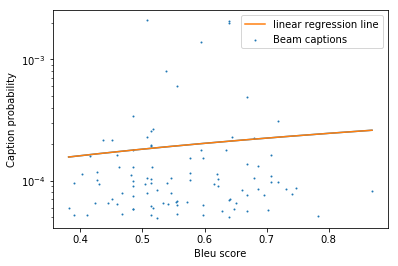

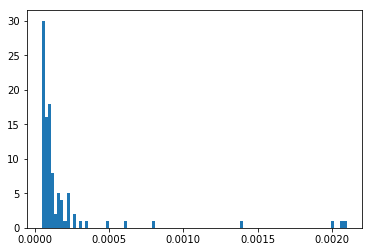

In [7]:
annotations = [' '.join(l) for l in annotations_dict[image_id]]
print(annotations)

captions = load_caption(image_id)
print("Total prob: ", captions['total_prob'])

caption_bleus = []
caption_probs = []
for p, caption in list(zip(captions['probabilities'],captions['captions'])):
    caption_probs.append(p)
    caption_bleus.append(bleu_score.sentence_bleu(annotations_dict[image_id], decode_caption(caption, vocab)))

slope, intercept, r_value, p_value, std_err = linregress(caption_bleus, caption_probs)
X = np.linspace(np.min(caption_bleus), np.max(caption_bleus), 1000)
Y = X * slope + intercept
print(slope, intercept)
print(r_value, p_value)
plt.figure()
plt.plot(X, Y)
plt.yscale('log')

plt.scatter(caption_bleus, caption_probs, s=1, label="Beam captions")

plt.plot(X, Y, label="linear regression line")
plt.xlabel("Bleu score")
plt.ylabel("Caption probability")
plt.legend()

plt.figure()
plt.hist(caption_probs, bins=100);

a small bedroom with a desk and computer in it
a bedroom that has a desk chair and bed in it
a chair sitting in front of a brown desk
a desk beside a window in a bedroom
a bed and a desk and chair by a big window


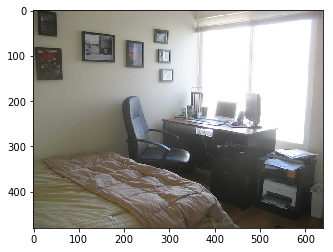

In [8]:
print_image(image_id)

for l in annotations_dict[image_id]:
    print(' '.join(l))

In [9]:
election_winners, winner_scores = rrv_votes(captions)
print(election_winners)

[array([  1,   4, 105, 116,  15,   5,  34,   6,   4,  73,   8,   4, 332,
         2]), array([  1,   4, 105, 116,  15,   5,  34,   6,   4,  73,   8,   4,  46,
         2]), array([  1,  16, 134, 105, 116,  15,   5,  34,   6,   4, 100, 127,   2]), array([  1,   4, 105, 116,  15,   5,  34,   6,   4, 100, 127,   2]), array([  1,   4, 105, 116,  15,   5,  34,   6,   4,   3, 127,   2])]


# Probability covered by beams

In [10]:
total_probs = []

images = os.listdir('../outputs/beam_captions')
for image in images:
    try:
        caption_object = load_caption(image)
        total_probs.append(caption_object['total_prob'])
    except JSONDecodeError:
        print("Error on ", image)
print("Images considered: {}".format(len(images)))
print("Average probability covered by beams: {}".format(sum(total_probs) / len(images)))

Images considered: 40503
Average probability covered by beams: 0.03439713872610978


17713


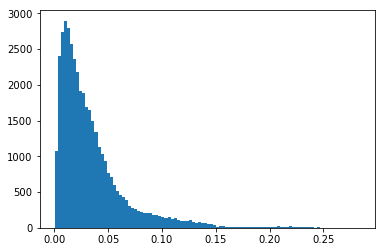

In [11]:
plt.hist(total_probs, bins=100);
print(np.argmax(total_probs))

# Compute vote captions

In [12]:
# beam_lengths = []
# vote_lengths = []
# vote_captions = {}
# images = os.listdir("../outputs/beam_captions/")
# print("To process: {}".format(len(images)))
# for i, image in enumerate(tqdm(images)):
#     image_id = int(image.split('.')[0])
#     try:
#         caption_object = load_caption(image_id)
#         beam_caption = decode_caption(caption_object['captions'][0])
#         vote_captions[image_id] = rrv_votes(caption_object, num_winners=5)
#         vote_lengths.append(len(decode_caption(vote_captions[image_id][0][0])))
#         beam_lengths.append(len(beam_caption))
#     except JSONDecodeError:
#         print("Error on ", image_id)
        
# with open('vote_captions.pickle', 'wb') as handle:
#     pickle.dump(vote_captions, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('vote_captions.backup.pickle', 'rb') as handle:
    vote_captions = pickle.load(handle)

In [13]:
# vote_captions_multiplicity = {}
# images = os.listdir("../outputs/beam_captions/")
# print("To process: {}".format(len(images)))
# for i, image in enumerate(tqdm(images)):
#     image_id = int(image.split('.')[0])
#     try:
#         caption_object = load_caption(image_id)
#         vote_captions_multiplicity[image_id] = rrv_votes_multiplicity(caption_object, num_winners=5)
#     except JSONDecodeError:
#         print("Error on ", image_id)
    
# with open('vote_captions_multiplicity.pickle', 'wb') as handle:
#     pickle.dump(vote_captions_multiplicity, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('vote_captions_multiplicity.backup.pickle', 'rb') as handle:
    vote_captions_multiplicity = pickle.load(handle)

In [14]:
# vote_captions_bigram = {}
# images = os.listdir("../outputs/beam_captions/")
# print("To process: {}".format(len(images)))
# for i, image in enumerate(tqdm(images)):
#     image_id = int(image.split('.')[0])
#     try:
#         caption_object = load_caption(image_id)
#         vote_captions_bigram[image_id] = rrv_votes(caption_object, num_winners=5, similarity='bigram')
#     except JSONDecodeError:
#         print("Error on ", image_id)
    
# with open('vote_captions_bigram.pickle', 'wb') as handle:
#     pickle.dump(vote_captions_bigram, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open('vote_captions_bigram.backup.pickle', 'rb') as handle:
    vote_captions_bigram = pickle.load(handle)

In [15]:
# vote_captions_bleu = {}
# images = os.listdir("../outputs/beam_captions/")
# print("To process: {}".format(len(images)))
# for i, image in enumerate(tqdm(images)):
#     image_id = int(image.split('.')[0])
#     try:
#         caption_object = load_caption(image_id)
#         vote_captions_bleu[image_id] = rrv_votes_bleu(caption_object, num_winners=5)
#     except JSONDecodeError:
#         print("Error on ", image_id)
    
# with open('vote_captions_bleu.pickle', 'wb') as handle:
#     pickle.dump(vote_captions_bleu, handle, protocol=pickle.HIGHEST_PROTOCOL)


# # with open('vote_captions_bleu.backup.pickle', 'rb') as handle:
#     vote_captions_bleu = pickle.load(handle)


# Evaluation using BLEU

Correct annotations:
some animals that are out in the grass
two brown animals grazing on a dirt trail
two cows roam and graze among trees and shrub along a mud path
two cows graze next to a dirt path
some wild animals are in the grass and trees

Beam captions

a couple of giraffes that are standing in the grass
a giraffe that is standing in the grass
a giraffe standing on top of a lush green field
a couple of animals that are standing in the grass

Voted captions
a couple of giraffes that are standing in the grass
a giraffe standing in the middle of a lush green field
a group of giraffes that are standing in the grass
a couple of giraffes that are standing in a field
a couple of animals that are standing in the grass

Corpus bleu: 1.0
Beam bleu: 0
Vote bleu: 0.3976353643835253


/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


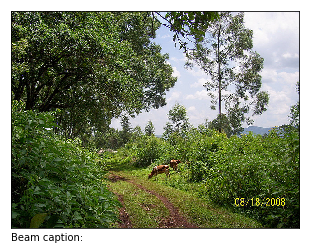

In [16]:
image_id = 594

print("Correct annotations:")
for cap in annotations_dict[image_id]:
    print(' '.join(cap))
 
print()
print("Beam captions")
beam_captions = load_caption(image_id)['captions']
beam_captions = [decode_caption(cap, vocab) for cap in beam_captions[:5]]
for cap in beam_captions:
    print(' '.join(cap))

print()
print("Voted captions")
voted_captions = [decode_caption(cap, vocab) for cap in vote_captions[image_id][0]]
for vote in voted_captions:
    print(' '.join(vote))
    
print()
print("Corpus bleu:", bleu_score.sentence_bleu(annotations_dict[image_id], annotations_dict[image_id][0]))
print("Beam bleu:", bleu_score.sentence_bleu(annotations_dict[image_id], beam_captions[0]))
print("Vote bleu:", bleu_score.sentence_bleu(annotations_dict[image_id], voted_captions[0]))

print_image(image_id)
plt.xticks([])
plt.yticks([])
plt.text(0, 510, "Beam caption: {}".format(' '.join(beam_captions[0])))
# plt.savefig("../../dissertation/figs/0_bleu_example_1.png", bbox_inches='tight')


In [17]:
annotation_captions = []
best_voted_caption = []
best_voted_multiplicty_caption = []
best_voted_bigram_caption = []
best_beam_caption = []

highest_beam_probs = []

for image_id in tqdm(vote_captions):
    annotation_captions.append(annotations_dict[image_id])
    
    best_voted_caption.append(decode_caption(vote_captions[image_id][0][0], vocab))
    best_voted_multiplicty_caption.append(decode_caption(vote_captions_multiplicity[image_id][0][0], vocab))
    best_voted_bigram_caption.append(decode_caption(vote_captions_bigram[image_id][0][0], vocab))

    loaded_cap = load_caption(image_id)
    if len(decode_caption(loaded_cap['captions'][0], vocab)) == 0:
        print(image_id)
        
    best_beam_caption.append(decode_caption(loaded_cap['captions'][0], vocab))
    highest_beam_probs.append(loaded_cap['probabilities'][0])
    

  2%|▏         | 826/40503 [00:00<00:23, 1655.03it/s]

515
594
688


  5%|▍         | 1832/40503 [00:01<00:23, 1671.35it/s]

1617
1756
1851


  5%|▌         | 2156/40503 [00:01<00:24, 1589.05it/s]

1962


  7%|▋         | 2784/40503 [00:01<00:24, 1550.76it/s]

2540


 10%|█         | 4248/40503 [00:02<00:22, 1597.98it/s]

4075


 12%|█▏        | 4754/40503 [00:02<00:21, 1657.66it/s]

4462
4579


 13%|█▎        | 5399/40503 [00:03<00:23, 1526.08it/s]

5220
5224
5331
5396
5528


 16%|█▌        | 6519/40503 [00:04<00:21, 1569.98it/s]

6251


 18%|█▊        | 7287/40503 [00:04<00:22, 1469.77it/s]

7032
7128
7315


 21%|██        | 8522/40503 [00:05<00:21, 1466.28it/s]

8339


 23%|██▎       | 9281/40503 [00:05<00:20, 1507.34it/s]

9079
9113
9342
9357
9362


 24%|██▍       | 9902/40503 [00:06<00:20, 1526.26it/s]

9740
9897


 26%|██▌       | 10364/40503 [00:06<00:19, 1508.77it/s]

10150


 28%|██▊       | 11268/40503 [00:07<00:19, 1492.94it/s]

11083


 30%|███       | 12173/40503 [00:07<00:19, 1445.14it/s]

11897
11954
12170


 32%|███▏      | 12800/40503 [00:08<00:18, 1522.84it/s]

12531
12776


 32%|███▏      | 13113/40503 [00:08<00:17, 1531.87it/s]

12885
13176


 34%|███▍      | 13747/40503 [00:08<00:17, 1561.73it/s]

13540
13594


 36%|███▌      | 14382/40503 [00:09<00:16, 1570.13it/s]

14100


 36%|███▋      | 14696/40503 [00:09<00:16, 1554.02it/s]

14482
14703
14714


 37%|███▋      | 15172/40503 [00:09<00:16, 1556.45it/s]

14939
15012
15099
15145


 39%|███▉      | 15823/40503 [00:10<00:15, 1611.53it/s]

15635
15652


 41%|████      | 16667/40503 [00:10<00:14, 1644.54it/s]

16396
16545


 43%|████▎     | 17318/40503 [00:11<00:14, 1594.21it/s]

17014


 46%|████▋     | 18767/40503 [00:12<00:13, 1572.59it/s]

18506
18702


 47%|████▋     | 19089/40503 [00:12<00:13, 1586.91it/s]

18845
18876


 48%|████▊     | 19571/40503 [00:12<00:13, 1585.07it/s]

19369
19508


 50%|█████     | 20409/40503 [00:13<00:12, 1616.61it/s]

20091
20380


 51%|█████     | 20731/40503 [00:13<00:12, 1579.52it/s]

20463
20505
20725


 53%|█████▎    | 21543/40503 [00:13<00:11, 1617.61it/s]

21233
21551


 54%|█████▍    | 21866/40503 [00:14<00:11, 1589.54it/s]

21596
21620
21634


 56%|█████▌    | 22657/40503 [00:14<00:11, 1532.21it/s]

22485
22616


 57%|█████▋    | 23141/40503 [00:14<00:10, 1583.07it/s]

22906
22920
23144


 59%|█████▉    | 23931/40503 [00:15<00:10, 1549.44it/s]

23726
23907


 61%|██████    | 24723/40503 [00:15<00:10, 1564.67it/s]

24488
24655
24791


 63%|██████▎   | 25359/40503 [00:16<00:09, 1564.16it/s]

25130


 65%|██████▍   | 26160/40503 [00:16<00:09, 1570.36it/s]

25905
25953
25956


 66%|██████▌   | 26798/40503 [00:17<00:12, 1069.30it/s]

26611


 69%|██████▊   | 27748/40503 [00:18<00:08, 1495.87it/s]

27438
27691
27750


 71%|███████   | 28694/40503 [00:18<00:07, 1546.88it/s]

28398
28611


 73%|███████▎  | 29715/40503 [00:19<00:06, 1648.86it/s]

29472
29618


 75%|███████▌  | 30384/40503 [00:19<00:06, 1620.76it/s]

30134
30282


 77%|███████▋  | 31050/40503 [00:20<00:05, 1611.80it/s]

30862


 80%|███████▉  | 32389/40503 [00:20<00:03, 2240.93it/s]

31794


 82%|████████▏ | 33051/40503 [00:20<00:02, 2681.95it/s]

32596
32737
32894
33105


 83%|████████▎ | 33711/40503 [00:21<00:02, 2961.51it/s]

33348
33383
33666
33776
33986


 85%|████████▍ | 34345/40503 [00:21<00:02, 3040.47it/s]

33988
34286


 87%|████████▋ | 35339/40503 [00:21<00:01, 3207.82it/s]

34712
34982
35121


 90%|████████▉ | 36317/40503 [00:21<00:01, 3189.14it/s]

35746
36003


 93%|█████████▎| 37581/40503 [00:22<00:00, 3085.92it/s]

37057
37144
37327
37423


 94%|█████████▍| 38210/40503 [00:22<00:00, 3088.83it/s]

37811
38343
38363


 98%|█████████▊| 39503/40503 [00:22<00:00, 3189.32it/s]

38875
38945


100%|██████████| 40503/40503 [00:23<00:00, 1739.05it/s]

40165
40200
40255
40262


In [18]:
total = 0
for i, beam_caption in enumerate(best_beam_caption):
    if len(beam_caption) == 0:
        total += 1
print(total)

123


In [19]:
beam_bleu_1 = bleu_score.corpus_bleu(annotation_captions, best_beam_caption, weights=[1])
vote_blue_1 = bleu_score.corpus_bleu(annotation_captions, best_voted_caption, weights=[1])
vote_multiplicity_blue_1 = bleu_score.corpus_bleu(annotation_captions, best_voted_multiplicty_caption, weights=[1])
vote_bigram_blue_1 = bleu_score.corpus_bleu(annotation_captions, best_voted_bigram_caption, weights=[1])
print("Beam bleu-1 score: {:.4f}".format(beam_bleu_1))
print("Voted bleu-1 score: {:.4f}".format(vote_blue_1))
print("Voted bigram bleu-1 score: {:.4f}".format(vote_bigram_blue_1))
print("Voted multiplicity bleu-1 score: {:.4f}".format(vote_multiplicity_blue_1))

Beam bleu-1 score: 0.6618
Voted bleu-1 score: 0.6636
Voted bigram bleu-1 score: 0.6720
Voted multiplicity bleu-1 score: 0.6646


In [20]:
beam_bleu_4 = bleu_score.corpus_bleu(annotation_captions, best_beam_caption)
vote_blue_4 = bleu_score.corpus_bleu(annotation_captions, best_voted_caption)
vote_multiplicity_blue_4 = bleu_score.corpus_bleu(annotation_captions, best_voted_multiplicty_caption)
vote_bigram_blue_4 = bleu_score.corpus_bleu(annotation_captions, best_voted_bigram_caption)
print("Beam bleu-4 score: {:.4f}".format(beam_bleu_4))
print("Voted bleu-4 score: {:.4f}".format(vote_blue_4))
print("Voted bigram bleu-4 score: {:.4f}".format(vote_bigram_blue_4))
print("Voted multiplicity bleu-4 score: {:.4f}".format(vote_multiplicity_blue_4))

Beam bleu-4 score: 0.2631
Voted bleu-4 score: 0.2460
Voted bigram bleu-4 score: 0.2713
Voted multiplicity bleu-4 score: 0.2458


In [21]:
vote_bleus = []
beam_bleus = []
vote_multiplicity_bleus = []
image_ids = []
for image_id in tqdm(vote_captions):
    annotations = annotations_dict[image_id]
    vote_bleu = bleu_score.sentence_bleu(annotations, decode_caption(vote_captions[image_id][0][0], vocab))
    beam_bleu = bleu_score.sentence_bleu(annotations, decode_caption(load_caption(image_id)['captions'][0], vocab))
    vote_multiplicity_bleu = bleu_score.sentence_bleu(annotations, decode_caption(vote_captions_multiplicity[image_id][0][0], vocab))
    
    image_ids.append(image_id)
    vote_bleus.append(vote_bleu)
    beam_bleus.append(beam_bleu)
    vote_multiplicity_bleus.append(vote_multiplicity_bleu)
    
vote_bleus = np.array(vote_bleus)
beam_bleus = np.array(beam_bleus)
vote_multiplicity_bleus = np.array(vote_multiplicity_bleus)
image_ids = np.array(image_ids)

  0%|          | 0/40503 [00:00<?, ?it/s]/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
100%|██████████| 40503/40503 [01:39<00:00, 407.23it/s]


In [22]:
print(len(best_beam_caption))
for c in best_beam_caption[:10]:
    print(' '.join(c))

40503
a bowl of soup sitting on a table
a public transit bus on a city street
a motorcycle parked on the side of a road
a laptop computer sitting on top of a wooden desk
a person that is standing in the grass
a close up of a child eating a doughnut
a man that is standing in the grass
a group of people walking down a street
a bus that is sitting in the grass
a close up of a dog in a cage


In [23]:
diff_vote = vote_bleus - beam_bleus
sort_order = np.argsort(diff_vote)

Beam bleu 1.000: a herd of sheep grazing on a lush green field
Vote bleu 0.237: a herd of sheep standing on top of a green grass covered field
Annotations:
some white sheep and a black and white dog and grass
a sheep being herded by a dog in the grass
a bunch of sheep being herded by a dog 
a sheep dog herding sheep through a grass field
a herd of sheep grazing on a lush green field
15820


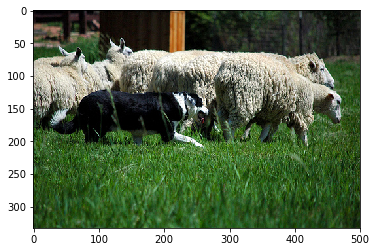


Beam bleu 1.000: a boat that is sitting in the water
Vote bleu 0.269: a boat on a body of water with a city in the background
Annotations:
a boat that is sitting in the water
a motor boat is sailing near a dock with other boats
an assortment of homes and watercraft dot a picturesque harbor
a small boat in a large body of water
several boats that are anchored in a body of water
31384


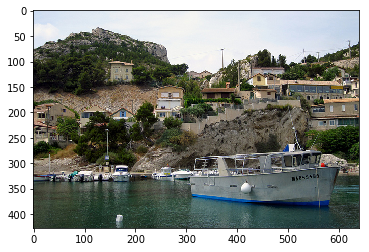


Beam bleu 1.000: a close up of a street sign with a sky background
Vote bleu 0.271: a couple of street signs sitting on top of a stop sign
Annotations:
a sign calls out public parking beneath a street marker
three black and white street signs with hazy sky in background
a close up of a street sign with a sky background
sign post at intersection with street and public parking signs
three signs sit on top of a street pole 
14694


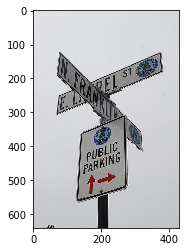


Beam bleu 1.000: a man riding skis down a snow covered slope
Vote bleu 0.274: a group of people riding skis down the side of a snow covered slope
Annotations:
a person on some skis in the snow
a man riding skis down a snow covered slope
a person skiing on snow with others behind
a man is skiing down a hill alone 
a skier goes airborne while skiing downhill on a mountain
7252


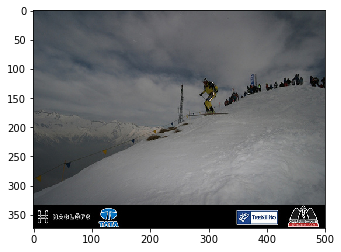


Beam bleu 1.000: a man riding skis down a snow covered slope
Vote bleu 0.274: a couple of people riding skis down the side of a snow covered slope
Annotations:
a man riding skis down a snow covered slope
a skier on a snow covered hill facing some snow covered hills
a cross country skier is stopped and looking at the vast terrain ahead
person dressed in green skiing down a mountain
a person is cross country skiing in the mountains
37116


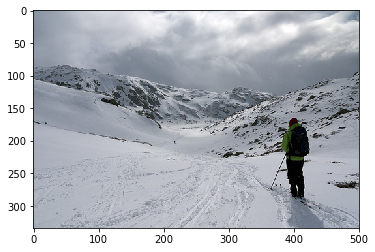


Beam bleu 1.000: a motorcycle parked in front of a brick building
Vote bleu 0.280: a motorcycle parked on the side of a street next to a building
Annotations:
a motorcycle parked in front of a house
the motorcycle is parked on the sidewalk near a building
a motorcycle parked in front of a brick building
a motorcycle parked outside a building on the walkway
a motorcycle parked on a cobblestone sidewalk in front of an old brick building
28472


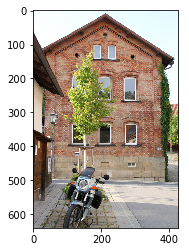


Beam bleu 1.000: a man standing in a kitchen preparing food
Vote bleu 0.285: a man standing in front of a kitchen counter preparing food
Annotations:
a man standing in a kitchen preparing food
a man that is in a big kitchen
an asian man in a restaurant kitchen 
a black and white image of a man in glasses working in a kitchen
the chef in the black and white photo is smiling in the kitchen
5598


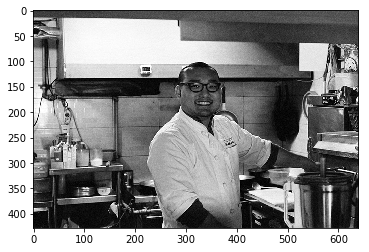


Beam bleu 1.000: a bird that is flying in the sky
Vote bleu 0.291: a couple of birds that are flying in the sky
Annotations:
a bird flying thru the sky with mountains in the background
a bird with a large sing span flying over trees
a bird in flights with mountains in the background
a bird soaring through a foggy sky over a snow covered mountain
a bird that is flying in the sky
2313


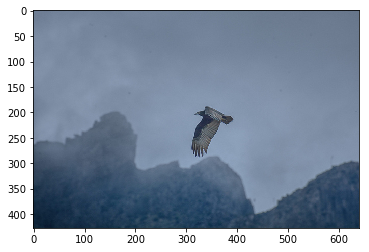


Beam bleu 1.000: a blender that is sitting on a counter
Vote bleu 0.298: a blender sitting on top of a counter in a kitchen
Annotations:
a blender is shown on a kitchen counter next to a sink
a blender sits on a counter top unplugged
a black blender sitting on a counter unplugged
a blender sitting on a counter near a sink
a blender that is sitting on a kitchen counter
12137


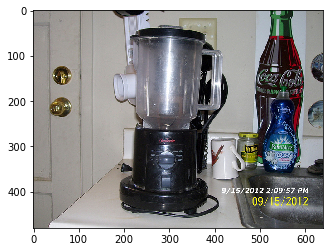


Beam bleu 1.000: a man preparing food inside of a kitchen
Vote bleu 0.298: a person in a kitchen preparing food inside of an oven
Annotations:
the man has dipped something in the bowl
a man places an object into a bowl sitting on the counter
a man preparing food inside of a kitchen
a man holding a doughnut over a bowl
a man is cooking desserts in a green kitchen with a green bowl 
15418


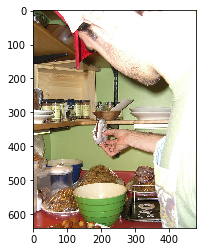

In [24]:
for i in range(10):
    image_id = image_ids[sort_order][i]
    beam_caption = ' '.join(decode_caption(load_caption(image_id)['captions'][0], vocab))
    vote_caption = ' '.join(decode_caption(vote_captions[image_id][0][0], vocab))
    beam_bleu = beam_bleus[sort_order][i]
    vote_bleu = vote_bleus[sort_order][i]
    print("Beam bleu {:.3f}: {}".format(beam_bleu, beam_caption))
    print("Vote bleu {:.3f}: {}".format(vote_bleu, vote_caption))
    print("Annotations:")
    for annotation in annotations_dict[image_id]:
        print(' '.join(annotation))
    print(image_id)
    print_image(image_id)
    plt.show()
    plt.figure()
    print()

9
Beam bleu 0.000: the kitchen is clean and ready to
Vote bleu 0.760: a kitchen with stainless steel appliances and lots of
Annotations:
a luggage carousel at an airport surrounded by luggage
an airport baggage claim station with patrons grabbing their luggage
a metallic baggage claim track at an a airport
people moving around a luggage retrieval conveyor belt
blurry picture of people in an airport near baggage claim


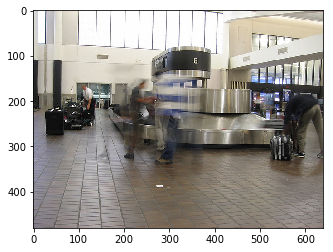


26
Beam bleu 0.351: a group of people sitting on top of a wooden bench
Vote bleu 1.000: a group of people that are sitting on a bench
Annotations:
a group of people that are sitting on a log
the group of three friends are sitting on a fallen tree in the woods
the young adults rest while playing frisbee golf
three people sitting on a bench in the woods
three friends sitting on a log making signing hand gestures 


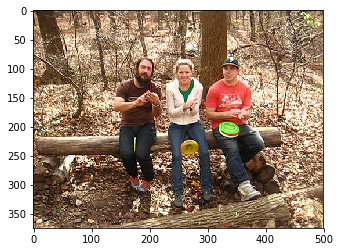


29
Beam bleu 0.366: a man holding a tennis racquet on a tennis court
Vote bleu 1.000: a man standing on top of a tennis court holding a racquet
Annotations:
a tennis player with a racket on a court
a man wearing his hat backward with a tennis racket and ball in his hand
a man on a tennis court holding a racquet
a man standing on a tennis court whil holding a ball and racket 
a man standing on top of a tennis court holding a racquet


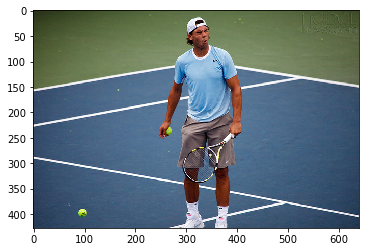


30
Beam bleu 0.338: a cow that is standing in the grass
Vote bleu 0.962: a couple of cows that are standing in a field
Annotations:
a herd of cows standing on top of a field
a couple of cows are standing in a field
a group of cows are standing in the grass together
a few cows standing in the grass near each other
a group of cows that are standing in the grass


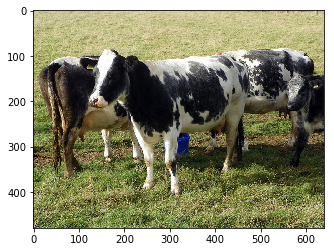


32
Beam bleu 0.331: a man holding a tennis racquet on a tennis court
Vote bleu 0.946: a man standing on top of a tennis court holding a racquet
Annotations:
a young man standing on top of a tennis court holding a racquet
a tennis player poses racket in his right hand left arm behind him
male tennis player delivery service during a game
a man that is on a tennis court with a racket
tennis player and white outfit swinging his racket on the court 


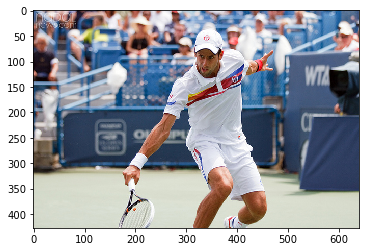


33
Beam bleu 0.050: an orange
Vote bleu 0.664: a close up of an orange and a 
Annotations:
looking down on a stony surface shows a bowl with an orange in it and what looks like a large piece of red plastic
a piece of orange in a bowl next to a concrete edge 
cement ledge with orange in bowl and red plastic bag below 
there is an orange in the cup and a bag in the water
an orange is sitting in a blue bowl


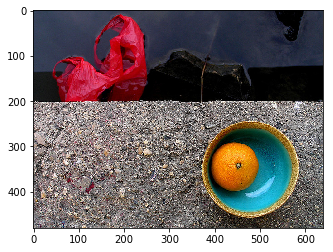


35
Beam bleu 0.393: a man holding a tennis racquet on a tennis court
Vote bleu 1.000: a man standing on top of a tennis court holding a racquet
Annotations:
a man standing on top of a tennis court holding a racquet
a tennis player is waiting to compete on a tennis court
a person that is wearing a visor and hold a tennis racket 
a man stands on a tennis court ready to play
a man in shorts and a white visor in a tennis stance


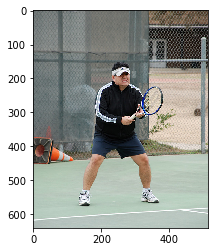


36
Beam bleu 0.244: a couple of people standing on top of a snow covered slope
Vote bleu 0.841: a couple of people that are standing on skis in the snow
Annotations:
a snowboarder poses next to two skiers on the mountain
four people are skiing on a snowy mountain
skiers and snowboarders on top of a mountain
snowboarder and skiers on a bright sunny day
a snowboarder and skiers on a snowy slope


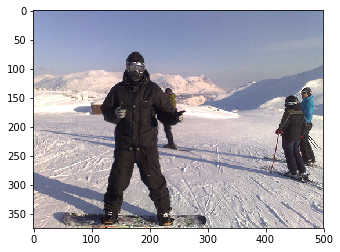


39
Beam bleu 0.330: a man standing on a beach holding a frisbee
Vote bleu 0.915: a man standing on the beach playing with a frisbee
Annotations:
two woman are playing paddle board on a beach 
two woman on a beach holding paddles for a game
two women on a cliff side beach hold paddles and are in the midst of bouncing a ball between them 
two young women playing a game of frisbee on a beach
two women who are holding discs on a beach


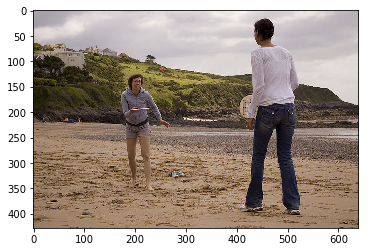


44
Beam bleu 0.427: a laptop computer sitting on top of a wooden desk
Vote bleu 1.000: a black and white photo of a living room with a
Annotations:
a room filled with lots of furniture and a table
a den with a couch table radio and a mirror
a small living room with antique furniture and old wallpaper
a black and white photo of a living room with a couch and a table 
a empty living room that has a table in the center


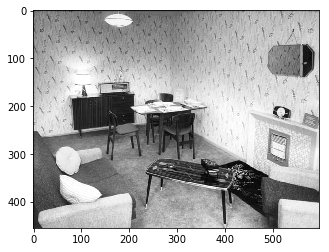

In [25]:
reverse_sort_order = sort_order[::-1]
count = 0
i = 0
while True:
    i += 1
    image_id = image_ids[reverse_sort_order][i]
#     print(image_id)
    vote_caption = ' '.join(decode_caption(vote_captions[image_id][0][0], vocab))
    beam_caption = ' '.join(decode_caption(load_caption(image_id)['captions'][0], vocab))
    if len(beam_caption) == 0:
        continue
    print(i)
    count += 1
    beam_bleu = beam_bleus[reverse_sort_order][i]
    vote_bleu = vote_bleus[reverse_sort_order][i]
    print("Beam bleu {:.3f}: {}".format(beam_bleu, beam_caption))
    print("Vote bleu {:.3f}: {}".format(vote_bleu, vote_caption))
    print("Annotations:")
    for annotation in annotations_dict[image_id]:
        print(' '.join(annotation))
    print_image(image_id)
    plt.show()
    plt.figure()
    print()
    if count == 10:
        break
    

4085
Beam bleu 0.366: a man holding a tennis racquet on a tennis court
Vote bleu 1.000: a man standing on top of a tennis court holding a racquet
Annotations:
a tennis player with a racket on a court
a man wearing his hat backward with a tennis racket and ball in his hand
a man on a tennis court holding a racquet
a man standing on a tennis court whil holding a ball and racket 
a man standing on top of a tennis court holding a racquet


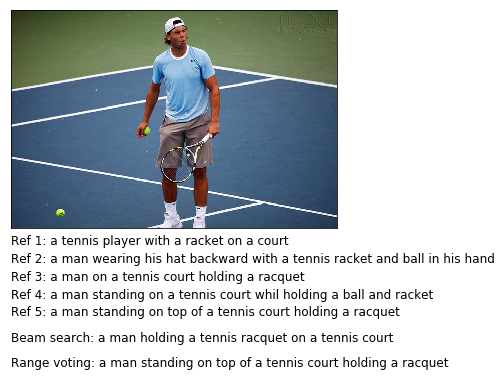

In [37]:
reverse_sort_order = sort_order[::-1]
i =  29

image_id = image_ids[reverse_sort_order][i]
print(image_id)
vote_caption = ' '.join(decode_caption(vote_captions[image_id][0][0], vocab))
beam_caption = ' '.join(decode_caption(load_caption(image_id)['captions'][0], vocab))
beam_bleu = beam_bleus[reverse_sort_order][i]
vote_bleu = vote_bleus[reverse_sort_order][i]
print("Beam bleu {:.3f}: {}".format(beam_bleu, beam_caption))
print("Vote bleu {:.3f}: {}".format(vote_bleu, vote_caption))
print("Annotations:")
for annotation in annotations_dict[image_id]:
    print(' '.join(annotation))
    
print_image(image_id)
plt.xticks([])
plt.yticks([])
for i in range(len(annotations_dict[image_id])):
    plt.text(0, 460 + i * 35, "Ref {}: {}".format(i + 1, ' '.join(annotations_dict[image_id][i])), fontsize=12)
plt.text(0, 650, "Beam search: {}".format(beam_caption), fontsize=12)
plt.text(0, 700, "Range voting: {}".format(vote_caption), fontsize=12)
plt.savefig("../../dissertation/figs/bad_bleu_example.png", bbox_inches='tight')

In [27]:
# Evaluate bleu for beam disallowing empty caption
total = 0
best_non_empty_beam_captions = []
for image_id in tqdm(vote_captions):
    loaded_cap = load_caption(image_id)
    i = 0
    if len(decode_caption(loaded_cap['captions'][0], vocab)) == 0:
        i = 1
        total += 1
    best_non_empty_beam_captions.append(decode_caption(loaded_cap['captions'][i], vocab))
print(total)

100%|██████████| 40503/40503 [00:11<00:00, 3535.51it/s]

123


In [28]:
non_empty_beam_bleu_1 = bleu_score.corpus_bleu(annotation_captions, best_non_empty_beam_captions, weights=[1])
non_empty_beam_bleu_4 = bleu_score.corpus_bleu(annotation_captions, best_non_empty_beam_captions, weights=[0.25, 0.25, 0.25, 0.25])
print(non_empty_beam_bleu_1)
print(non_empty_beam_bleu_4)

0.6635489569997782
0.26362774284128593


# Evaluation using ROUGE

In [ ]:
sys.path.append('../rouge/')

from pythonrouge.pythonrouge import Pythonrouge 

# Extra

There is no correlation between BLEU and the probability of most likely sentence

In [124]:
beam_bleu_scores = []
voted_bleu_scores = []
for annotations_caption, beam_caption, voted_caption in zip(annotation_captions, best_beam_caption, best_voted_caption):
    beam_bleu_scores.append(bleu_score.sentence_bleu(annotations_caption, beam_caption))
    voted_bleu_scores.append(bleu_score.sentence_bleu(annotations_caption, voted_caption))    
beam_bleu_scores = np.array(beam_bleu_scores)
voted_bleu_scores = np.array(voted_bleu_scores)
highest_beam_probs = np.array(highest_beam_probs)

/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/Users/sebastian/anaconda/envs/python3/lib/python3.5/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [151]:
# Beam captions with a zero score
for i in np.where(beam_bleu_scores == 0)[0]:
    if len(best_beam_caption[i]) > 0:
        print(best_beam_caption[i])
        print(i)

['the', 'meal', 'is', 'prepared', 'and', 'ready', 'to', 'be', 'pizzas']
1704
['the', 'kitchen', 'is', 'clean', 'and', 'ready', 'to']
21102


0.002710529638906113 0.0024952261620648035
0.0697813791869766 6.645341315268036e-45


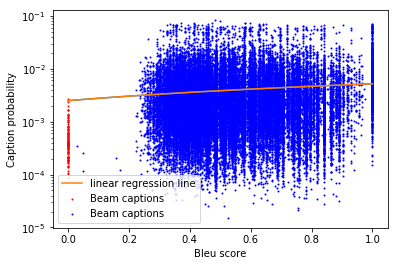

In [140]:
slope, intercept, r_value, p_value, std_err = linregress(beam_bleu_scores, highest_beam_probs)
X = np.linspace(np.min(beam_bleu_scores), np.max(beam_bleu_scores), 1000)
Y = X * slope + intercept
print(slope, intercept)
print(r_value, p_value)
plt.figure()
plt.plot(X, Y)
plt.yscale('log')

plt.scatter(beam_bleu_scores[beam_bleu_scores == 0], highest_beam_probs[beam_bleu_scores == 0], s=1, c='red', label="Beam captions")
plt.scatter(beam_bleu_scores[beam_bleu_scores > 0], highest_beam_probs[beam_bleu_scores > 0], s=1, c='blue', label="Beam captions")
plt.xlim([-0.05, 1.05])

plt.plot(X, Y, label="linear regression line")
plt.xlabel("Bleu score")
plt.ylabel("Caption probability")
plt.legend()

plt.savefig("../../dissertation/figs/prob_bleu_beam.png", bbox_inces='tight')

-5.59166642159885e-05 0.004006288304036617
-0.00135180400154351 0.7855857954120333
0.14985197605321357


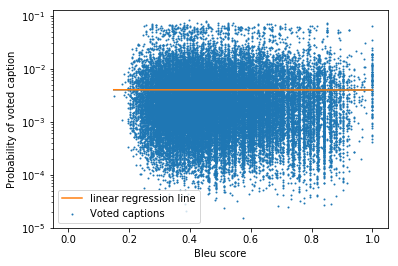

In [96]:
# TODO use vote score, not probability?
slope, intercept, r_value, p_value, std_err = linregress(voted_bleu_scores, highest_beam_probs)
X = np.linspace(np.min(voted_bleu_scores), np.max(voted_bleu_scores), 100)
Y = X * slope + intercept
print(slope, intercept)
print(r_value, p_value)
plt.figure()
plt.plot(X, Y)
plt.yscale('log')
plt.scatter(voted_bleu_scores, highest_beam_probs, s=1, label="Voted captions")

plt.plot(X, Y, label="linear regression line")
plt.xlabel("Bleu score")
plt.ylabel("Probability of voted caption")
plt.xlim([-0.05, 1.05])
plt.legend()
print(np.min(voted_bleu_scores))
plt.savefig("../../dissertation/figs/prob_bleu_voted.png", bbox_inces='tight')